**EDA**
************


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers_df = pd.read_csv('/kaggle/input/ecommerce-data/Customers.csv')
products_df = pd.read_csv('/kaggle/input/ecommerce-data/Products.csv')
transactions_df = pd.read_csv('/kaggle/input/ecommerce-data/Transactions.csv')

In [3]:
print("Customers Data:")
print(customers_df.head())

print("\nProducts Data:")
print(products_df.head())

print("\nTransactions Data:")
print(transactions_df.head())

Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127 

**Checking for missing values in each DataFrame**

In [4]:
print("Missing values in Customers Data:")
print(customers_df.isnull().sum())

print("\nMissing values in Products Data:")
print(products_df.isnull().sum())

print("\nMissing values in Transactions Data:")
print(transactions_df.isnull().sum())

Missing values in Customers Data:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing values in Products Data:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing values in Transactions Data:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


**Basic statistics for numerical columns**

In [5]:

print("Customers Data Description:")
print(customers_df.describe())

print("\nProducts Data Description:")
print(products_df.describe())

print("\nTransactions Data Description:")
print(transactions_df.describe())

Customers Data Description:
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3

Products Data Description:
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000

Transactions Data Description:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


**Distribution plot for product prices and transactions per customer**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


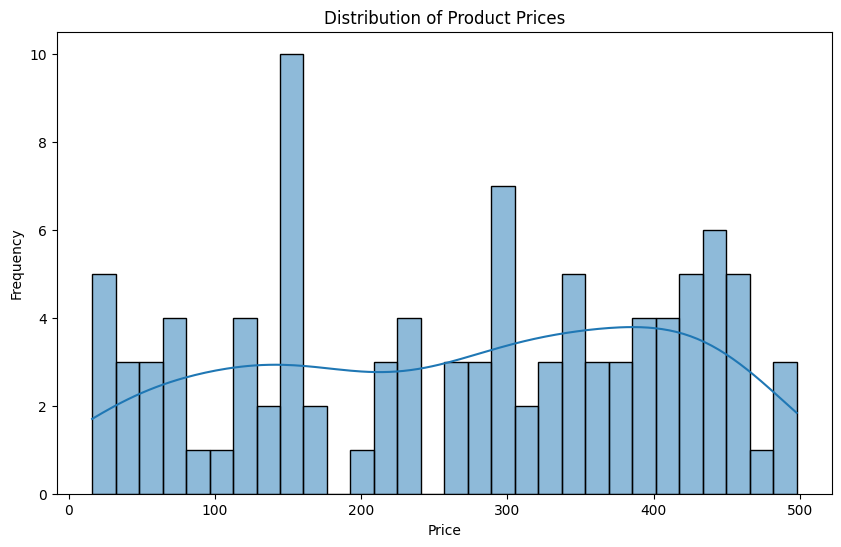

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


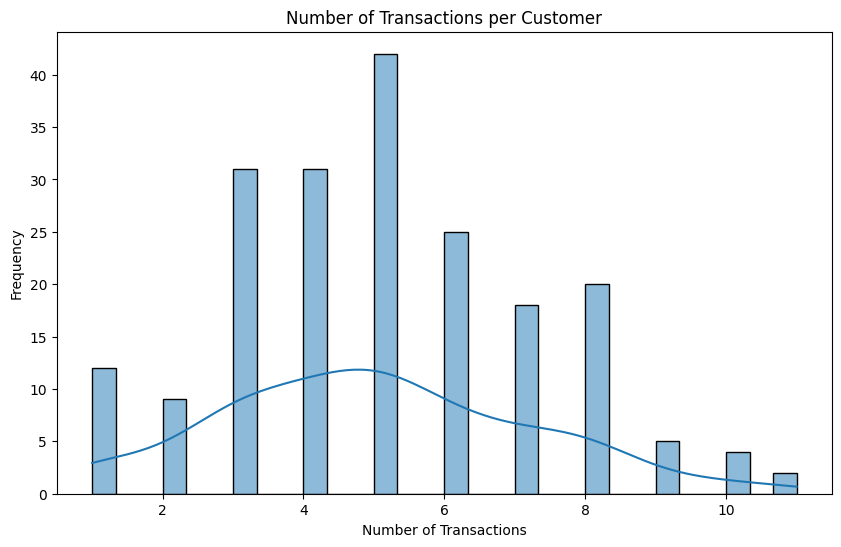

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(products_df['Price'], bins=30, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

transaction_counts = transactions_df['CustomerID'].value_counts()
plt.figure(figsize=(10, 6))
sns.histplot(transaction_counts, bins=30, kde=True)
plt.title('Number of Transactions per Customer')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.show()

In [7]:
merged_df = pd.merge(transactions_df, customers_df, on='CustomerID', how='left')
merged_df = pd.merge(merged_df, products_df, on='ProductID', how='left')

print(merged_df.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker

In [8]:
merged_df.to_csv('Merged_Data.csv', index=False)

**Total sales by region**

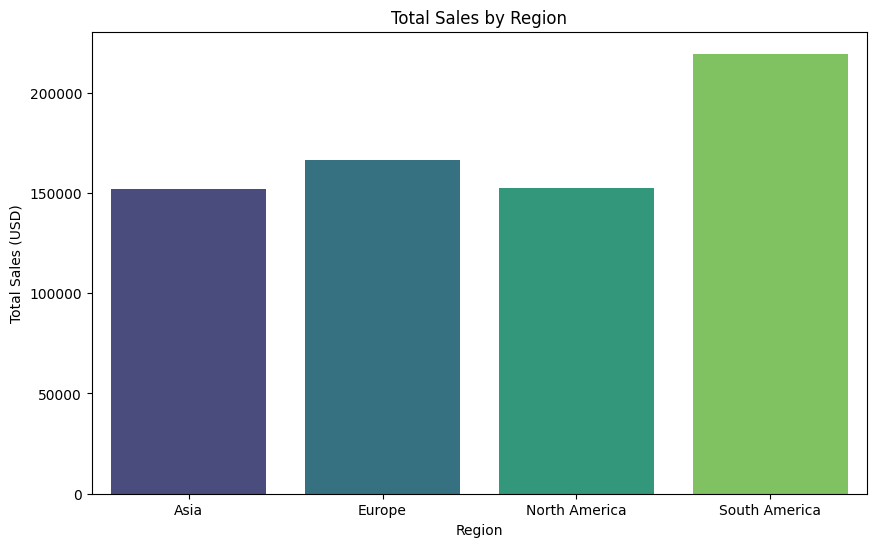

In [9]:

sales_by_region = merged_df.groupby('Region')['TotalValue'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='TotalValue', data=sales_by_region, palette='viridis')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales (USD)')
plt.show()

**Top selling products by quantity**

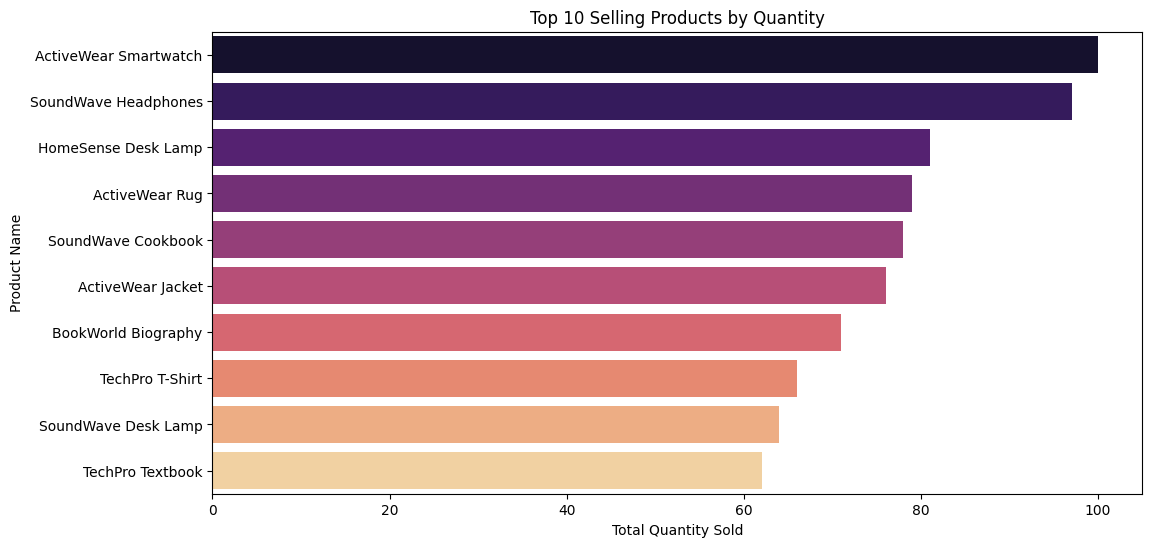

In [10]:
top_products = merged_df.groupby('ProductName')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Quantity', y='ProductName', data=top_products.head(10), palette='magma')
plt.title('Top 10 Selling Products by Quantity')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Name')
plt.show()

**Customer signups over time**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


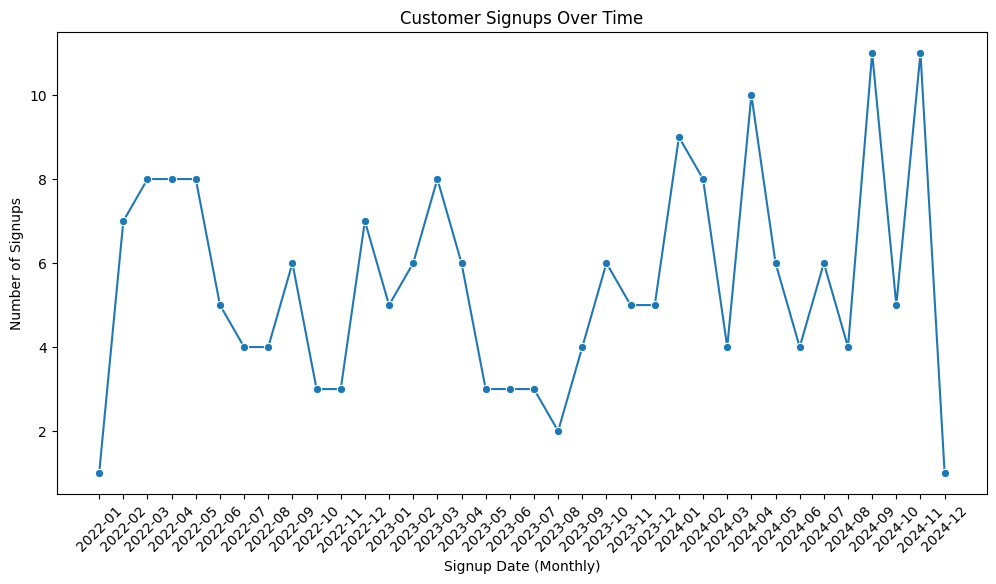

In [11]:
merged_df['SignupDate'] = pd.to_datetime(merged_df['SignupDate'])
signups_over_time = merged_df.groupby(merged_df['SignupDate'].dt.to_period('M'))['CustomerID'].nunique().reset_index()
signups_over_time['SignupDate'] = signups_over_time['SignupDate'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(x='SignupDate', y='CustomerID', data=signups_over_time, marker='o')
plt.title('Customer Signups Over Time')
plt.xlabel('Signup Date (Monthly)')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.show()

** Average transaction value by region**

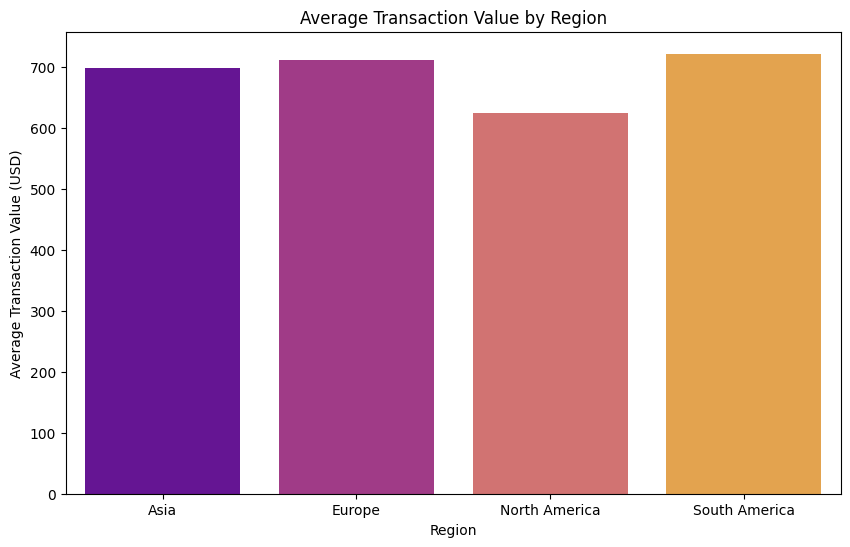

In [12]:
avg_transaction_value = merged_df.groupby('Region')['TotalValue'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='TotalValue', data=avg_transaction_value, palette='plasma')
plt.title('Average Transaction Value by Region')
plt.xlabel('Region')
plt.ylabel('Average Transaction Value (USD)')
plt.show()

**Customer Lifetime Value**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


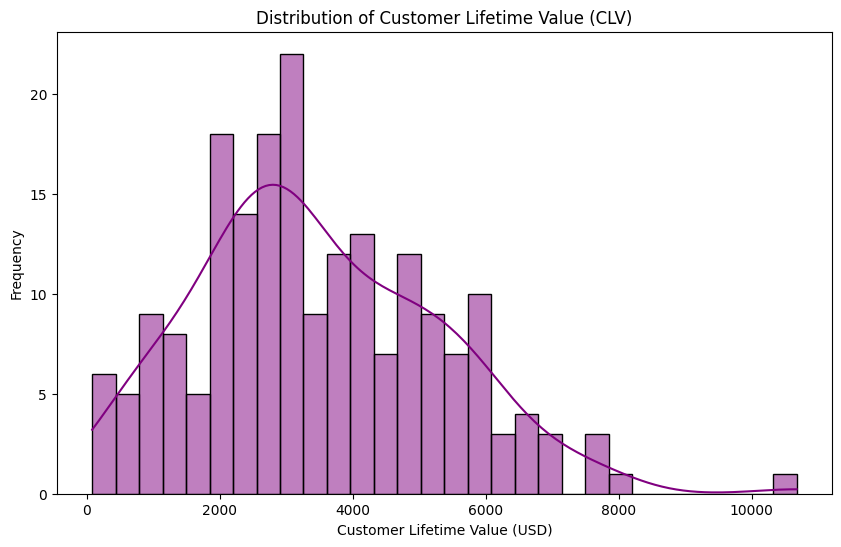

In [13]:
clv = merged_df.groupby('CustomerID')['TotalValue'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.histplot(clv['TotalValue'], bins=30, kde=True, color='purple')
plt.title('Distribution of Customer Lifetime Value (CLV)')
plt.xlabel('Customer Lifetime Value (USD)')
plt.ylabel('Frequency')
plt.show()

**Total revenue by product category**

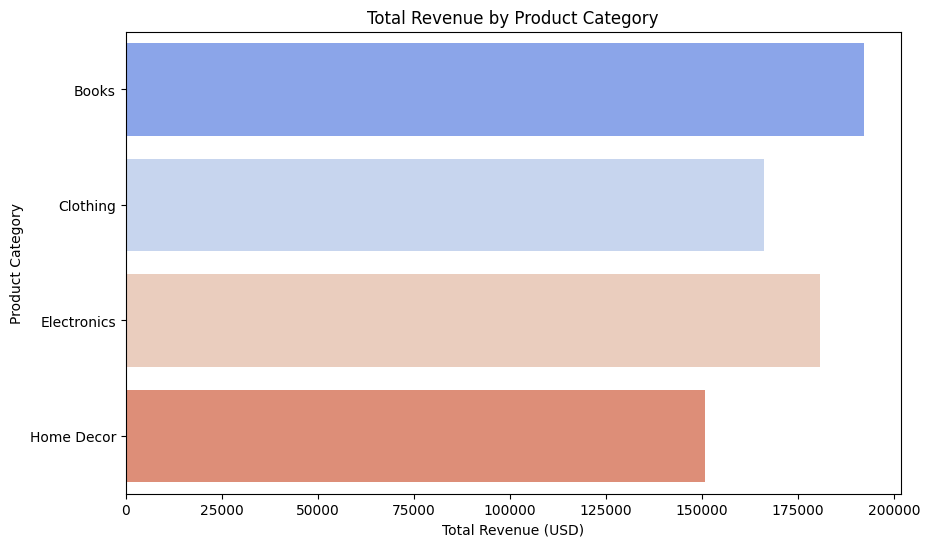

In [14]:
revenue_by_category = merged_df.groupby('Category')['TotalValue'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='TotalValue', y='Category', data=revenue_by_category, palette='coolwarm')
plt.title('Total Revenue by Product Category')
plt.xlabel('Total Revenue (USD)')
plt.ylabel('Product Category')
plt.show()

Heatmap for quantity sold by region and category

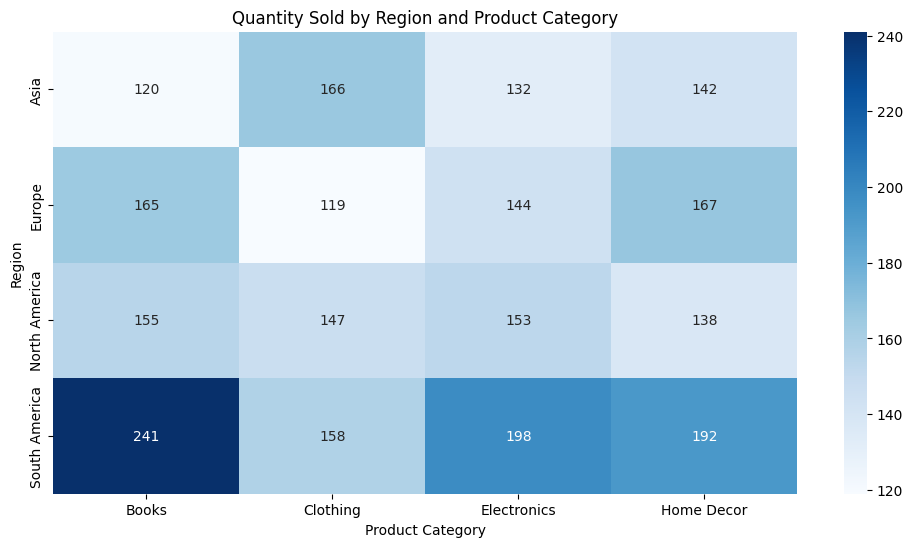

In [15]:
quantity_pivot = merged_df.pivot_table(index='Region', columns='Category', values='Quantity', aggfunc='sum').fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(quantity_pivot, annot=True, fmt=".0f", cmap='Blues', cbar=True)
plt.title('Quantity Sold by Region and Product Category')
plt.xlabel('Product Category')
plt.ylabel('Region')
plt.show()

Repeat customers

In [16]:
repeat_customers = merged_df.groupby('CustomerID')['TransactionID'].count().reset_index()
repeat_customers['Repeat'] = repeat_customers['TransactionID'] > 1

repeat_percentage = repeat_customers['Repeat'].mean() * 100
print(f"Percentage of repeat customers: {repeat_percentage:.2f}%")

repeat_customer_ids = repeat_customers[repeat_customers['Repeat']]['CustomerID']
repeat_revenue = merged_df[merged_df['CustomerID'].isin(repeat_customer_ids)]['TotalValue'].sum()
total_revenue = merged_df['TotalValue'].sum()
repeat_revenue_percentage = (repeat_revenue / total_revenue) * 100
print(f"Revenue contribution from repeat customers: {repeat_revenue_percentage:.2f}%")


Percentage of repeat customers: 93.97%
Revenue contribution from repeat customers: 99.08%


**popular products by region**

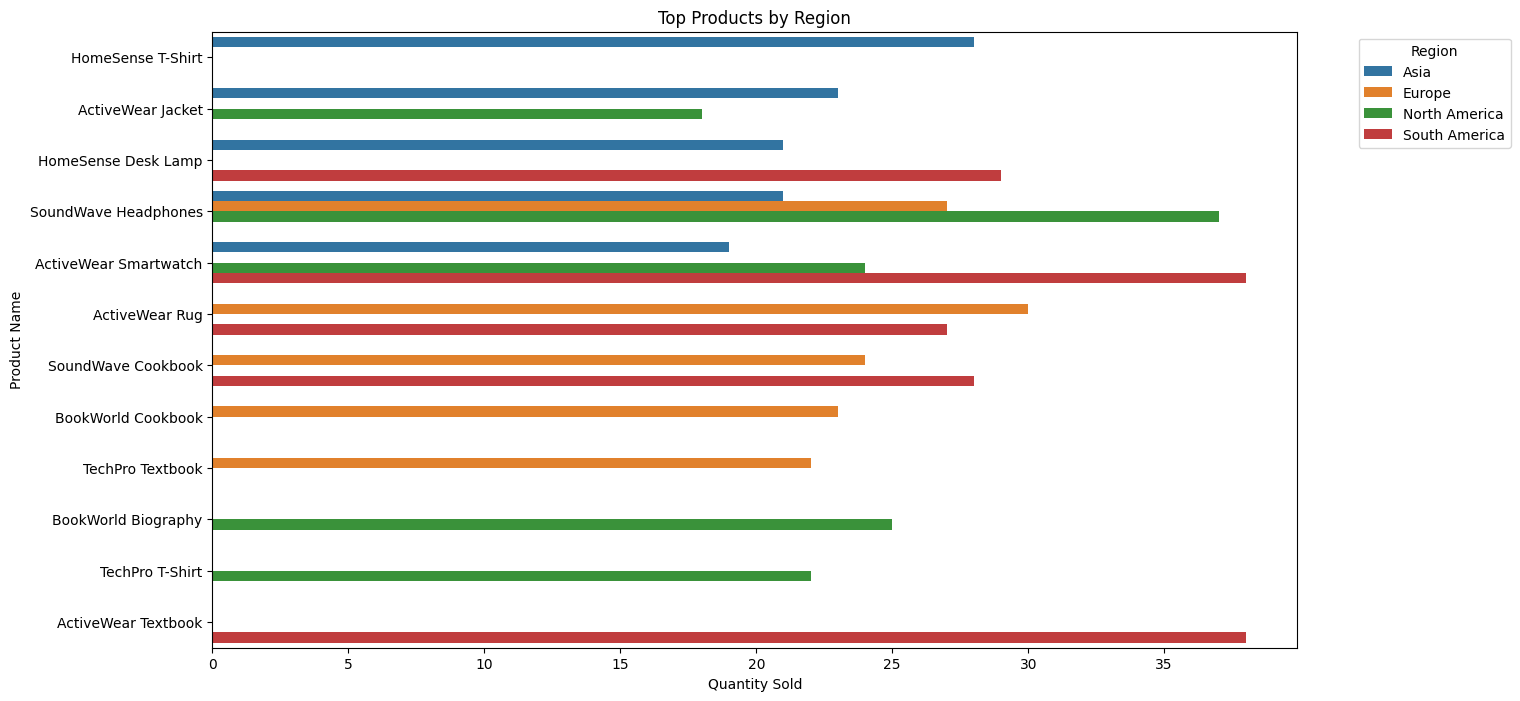

In [17]:
popular_products_region = merged_df.groupby(['Region', 'ProductName'])['Quantity'].sum().reset_index()
popular_products_region = popular_products_region.sort_values(['Region', 'Quantity'], ascending=[True, False]).groupby('Region').head(5)

plt.figure(figsize=(14, 8))
sns.barplot(x='Quantity', y='ProductName', hue='Region', data=popular_products_region, palette='tab10')
plt.title('Top Products by Region')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**Average revenue per product category**

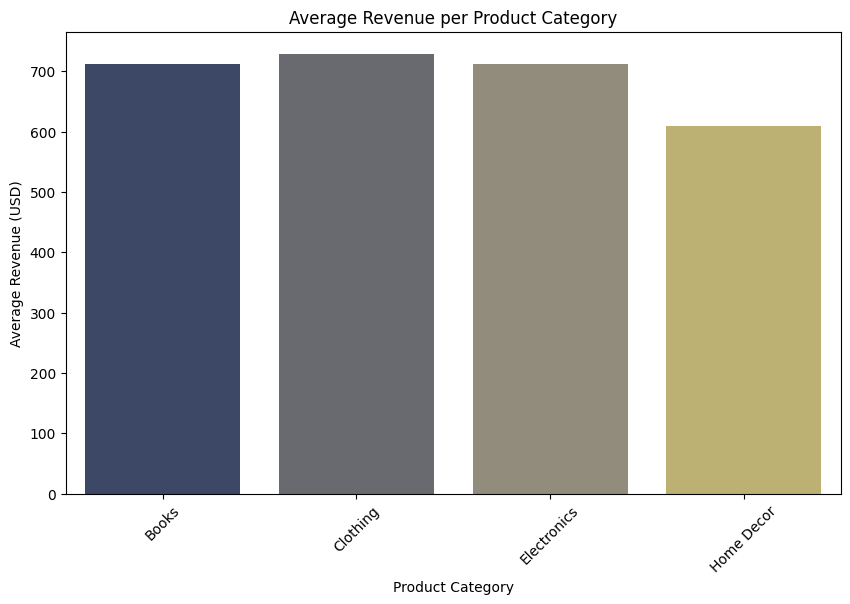

In [18]:
avg_revenue_category = merged_df.groupby('Category')['TotalValue'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='TotalValue', data=avg_revenue_category, palette='cividis')
plt.title('Average Revenue per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Revenue (USD)')
plt.xticks(rotation=45)
plt.show()


**correlation**

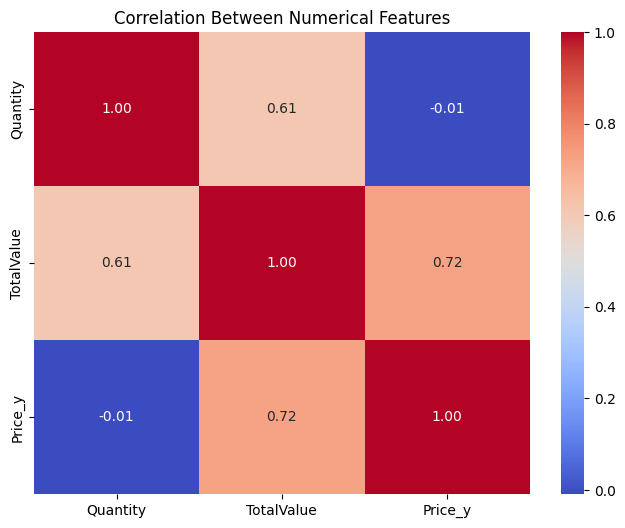

In [19]:
correlation_matrix = merged_df[['Quantity', 'TotalValue', 'Price_y']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Numerical Features')
plt.show()



Here are the key business insights derived from the EDA and visualizations of the customer, product, and transaction data:

1. Regional Sales Performance
•	South America dominates sales: Accounts for the highest total sales, followed by Asia.
Action: Prioritize marketing investments and inventory allocation in high-performing regions like South America.
•	Highest Average Transaction Value (ATV): South America also leads in ATV, suggesting customers there spend more per purchase.
Opportunity: Bundle premium products or offer upsells to capitalize on higher spending behavior.
2. Product Performance
•	Top Selling Products by Quantity:
o	ActiveWear Smartwatch, SoundWave Headphones, and HomeSense Desk Lamp are top performers.
Action: Increase stock for high-demand items and feature them in promotions.
•	Revenue by Category:
o	Electronics generate the highest revenue (e.g., smartwatches, headphones), followed by Books.
Opportunity: Expand the electronics category with complementary accessories.
3. Customer Behavior
•	Repeat Customers Drive Revenue:
o	94% of customers are repeat buyers, contributing 99% of total revenue.
Action: Strengthen loyalty programs (e.g., discounts for repeat purchases) to retain this critical segment.
•	Customer Lifetime Value (CLV):
o	Most customers have a CLV below $2,000, but a small group exceeds $8,000.
Opportunity: Identify and target high-CLV customers with personalized offers.
4. Temporal Trends
•	Signup Surge in March 2024: A spike in customer signups occurred in Q1 2024.
Investigate: Correlate with marketing campaigns or seasonal trends to replicate success.
•	Stable Transaction Frequency: Most customers make 1–4 transactions, with a mean of ~2.5.
Action: Incentivize higher purchase frequency (e.g., subscription models).
5. Pricing & Category Strategy
•	Electronics Command Premium Prices:
o	Products like ActiveWear Smartwatch ($346) and SoundWave Headphones ($300+) drive high margins.
Opportunity: Introduce tiered pricing (e.g., basic vs. premium versions).
•	Low Revenue in Home Decor: Despite moderate sales volume, this category underperforms.
Action: Reassess pricing or product differentiation (e.g., eco-friendly materials).
6. Operational Insights
•	No Missing Data: All datasets are clean, ensuring reliability for decision-making.
•	Correlation Between Price and Quantity Sold:
o	Weak negative correlation (-0.12), suggesting price hikes may reduce volume.
Caution: Test price elasticity before adjusting costs.

